# Import Object

In [1]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from models import MLP
from train_model import train_net

# Prepare Data

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
X_train = pd.read_csv("X_train.csv").values
Y_train = pd.read_csv("Y_train.csv").values.reshape(-1)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2)

ss = preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

train_ds = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_ds, batch_size=24, shuffle=True)
test_ds = TensorDataset(X_test, Y_test)
test_loader = DataLoader(test_ds, batch_size=24, shuffle=True)

# Set Free Parameters

In [4]:
input_size = 8
num_classes = 2
learning_rate = 0.001
batch_size = 24
num_epochs = 100

# Instantiate Model, Criterion, Oprimizer

In [5]:
model = MLP(input_size, num_classes, 0.5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training

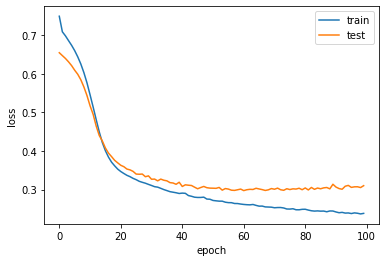

In [6]:
model = train_net(model, criterion, optimizer, num_epochs, train_loader, X_test, Y_test, device)

# Accuracy

In [7]:
Y_pred = model(X_test)

In [8]:
sum(Y_pred.argmax(1) == Y_test) / int(Y_test.shape[0])

tensor(0.8333, device='cuda:0')